![DATE Header.jpg](attachment:0552de82-cb1f-4a61-8056-09a17fed23db.jpg)

##  PRASHANTH KANNADAGULI

### DEEP LEARNING INTERNSHIP Mini Project 2: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the miniproject, you will be able to :

* load and extract features of images using ImageDataGenerator

* build the convolutional neural networks

* use the pre-trained models using keras applications

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people do not correctly wear their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset:
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

Download and unzip dataset from: https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip

## Grading = 10 Points

In [ ]:
!wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip -O MP2_FaceMask_Dataset.zip

# Unzip (ensure it creates the MP2_FaceMask_Dataset folder)
!unzip -q MP2_FaceMask_Dataset.zip

# Verify structure
!ls MP2_FaceMask_Dataset/

--2025-05-01 02:49:09--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589920212 (563M) [application/zip]
Saving to: ‘MP2_FaceMask_Dataset.zip’

MP2_FaceMask_Datase 100%[===================>] 562.59M  13.2MB/s    in 46s     

2025-05-01 02:49:56 (12.3 MB/s) - ‘MP2_FaceMask_Dataset.zip’ saved [589920212/589920212]

test  train


### Import Required packages

In [ ]:
import numpy as np
import PIL
from matplotlib import pyplot as plt
import tensorflow as tf # Use tensorflow directly for newer versions
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop # Import optimizers
import os
import glob

print("Libraries imported successfully.")

Required packages imported.


## Data Loading and preprocessing (2 points)

### Analyze the shape of images and distribution of classes

In [ ]:
# Define Directories (Ensure these paths match your unzipped dataset location)
# If running in Colab after unzipping, these paths are likely correct.
# If running locally, adjust the base path accordingly.
BASE_DIR = "./MP2_FaceMask_Dataset/" # Adjust if needed
TRAINING_DIR = os.path.join(BASE_DIR, "train")
VALIDATION_DIR = os.path.join(BASE_DIR, "test")

# Block 5: Analyze the shape of images and distribution of classes
print("\n--- Data Analysis ---")
classes = ['with_mask', 'without_mask', 'partial_mask']
image_shapes = {}
train_counts = {}
test_counts = {}

# Analyze Training Data
print("Training Data:")
for cls in classes:
    class_path = os.path.join(TRAINING_DIR, cls)
    try:
        image_files = glob.glob(os.path.join(class_path, '*.[jp][pn]g')) # Handle jpg/png
        train_counts[cls] = len(image_files)
        print(f"- Class '{cls}': {train_counts[cls]} images")
        if image_files: # Check if list is not empty
            # Get shape of the first image in each class
            img = PIL.Image.open(image_files[0])
            image_shapes[cls] = img.size # (width, height)
            print(f"  - Sample image shape (Width, Height): {image_shapes[cls]}")
        else:
            print(f"  - No images found for class '{cls}'")
    except FileNotFoundError:
         print(f"  - Directory not found for class '{cls}': {class_path}")


# Analyze Test Data
print("\nTest Data:")
for cls in classes:
    class_path = os.path.join(VALIDATION_DIR, cls)
    try:
        image_files = glob.glob(os.path.join(class_path, '*.[jp][pn]g'))
        test_counts[cls] = len(image_files)
        print(f"- Class '{cls}': {test_counts[cls]} images")
    except FileNotFoundError:
         print(f"  - Directory not found for class '{cls}': {class_path}")

print("--------------------\n")



--- Data Analysis ---
Training Data:
- Class 'with_mask': 1574 images
  - Sample image shape (Width, Height): (160, 160)
- Class 'without_mask': 2127 images
  - Sample image shape (Width, Height): (160, 160)
- Class 'partial_mask': 1294 images
  - Sample image shape (Width, Height): (1024, 1024)

Test Data:
- Class 'with_mask': 396 images
- Class 'without_mask': 527 images
- Class 'partial_mask': 323 images
--------------------



### Load the images using ImageDataGenerator

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://keras.io/api/preprocessing/image/)

In [ ]:
TRAINING_DIR = "/content/MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "/content/MP2_FaceMask_Dataset/test/"

In [ ]:
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
BATCH_SIZE = 32 # Standard batch size

# Training Data Generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Shear intensity
    zoom_range=0.2,          # Randomly zoom in
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Strategy for filling newly created pixels
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical' # For multi-class classification
)

# Validation Data Generator (No Augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Keep validation order consistent for evaluation
)

print("\n--- Data Generators Created ---")
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes in the training set.")
print(f"Found {validation_generator.samples} images belonging to {validation_generator.num_classes} classes in the validation set.")
print(f"Class Indices: {train_generator.class_indices}")
print("-----------------------------\n")


Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.

--- Data Generators Created ---
Found 5029 images belonging to 3 classes in the training set.
Found 1259 images belonging to 3 classes in the validation set.
Class Indices: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}
-----------------------------



### Visualize the sample images of each class using data generator

Hint: plt.subplot

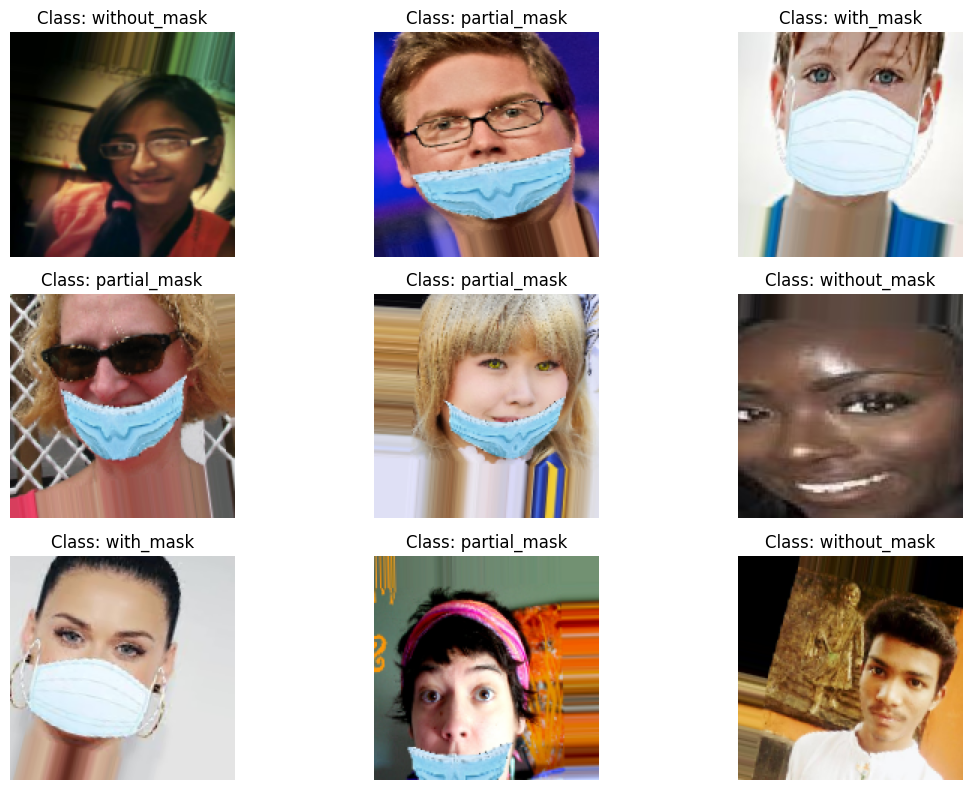

------------------------------------------



In [ ]:
print("\n--- Sample Images from Training Generator ---")

# Get one batch of images and labels
sample_images, sample_labels = next(train_generator)

# Get class names from the generator's class indices
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(12, 8))
for i in range(min(9, BATCH_SIZE)): # Show up to 9 images
    plt.subplot(3, 3, i + 1)
    # Display the image - ImageDataGenerator output is float [0,1]
    plt.imshow(sample_images[i])
    # Find the class index from one-hot encoded label
    class_index = np.argmax(sample_labels[i])
    plt.title(f"Class: {class_names[class_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
print("------------------------------------------\n")

## Build the CNN model using Keras (4 points)



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,147 (13.18 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)


--- Training Custom CNN Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 319ms/step - accuracy: 0.7224 - loss: 0.6401 - val_accuracy: 0.9367 - val_loss: 0.1725
Epoch 2/20
  1/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9375 - loss: 0.1835

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9375 - loss: 0.1835 - val_accuracy: 0.9239 - val_loss: 0.2027
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 374ms/step - accuracy: 0.9074 - loss: 0.2650 - val_accuracy: 0.9655 - val_loss: 0.1245
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9062 - loss: 0.2949 - val_accuracy: 0.9647 - val_loss: 0.1299
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 400ms/step - accuracy: 0.9288 - loss: 0.2013 - val_accuracy: 0.9623 - val_loss: 0.1238
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9062 - loss: 0.1587 - val_accuracy: 0.9551 - val_loss: 0.1354
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 524ms/step - accuracy: 0.9388 - loss: 0.1865 - val_accuracy: 0.9728 - val_loss: 0.1033
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9688 - loss: 0.1384 - val_accuracy: 0.9736 - val_loss: 0.0988
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 525ms/step - accuracy: 0.9524 - loss: 0.1515 - val_accurac

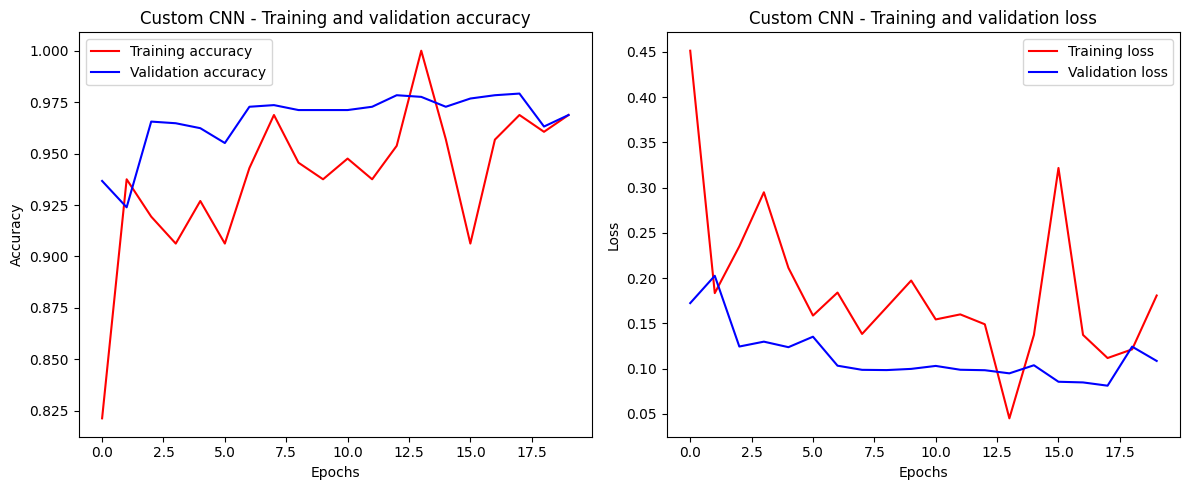

----------------------------------



In [ ]:
print("\n--- Building Custom CNN Model ---")

model_custom = Sequential([
    # Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    MaxPooling2D(2, 2),

    # Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer 4
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the results to feed into a DNN
    Flatten(),

    # Dense Layer with Dropout
    Dense(512, activation='relu'),
    Dropout(0.5), # Dropout for regularization

    # Output Layer
    Dense(3, activation='softmax') # 3 classes: with_mask, without_mask, partial_mask
])

# Compile the model
model_custom.compile(
    optimizer=Adam(learning_rate=0.001), # Adam optimizer is often a good default
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model_custom.summary()

print("\n--- Training Custom CNN Model ---")

# Define callbacks
early_stopping_custom = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# model_checkpoint_custom = ModelCheckpoint('custom_cnn_best.keras', save_best_only=True, monitor='val_accuracy') # Use .keras format

# Calculate steps per epoch
steps_per_epoch_train = train_generator.samples // BATCH_SIZE
steps_per_epoch_val = validation_generator.samples // BATCH_SIZE
if steps_per_epoch_train == 0: steps_per_epoch_train = 1 # Ensure at least one step
if steps_per_epoch_val == 0: steps_per_epoch_val = 1 # Ensure at least one step


EPOCHS_CUSTOM = 20 # Can increase if needed, but watch for overfitting

history_custom = model_custom.fit(
    train_generator,
    epochs=EPOCHS_CUSTOM,
    validation_data=validation_generator,
    steps_per_epoch=steps_per_epoch_train,
    validation_steps=steps_per_epoch_val,
    callbacks=[early_stopping_custom], # Add checkpoint if desired
    verbose=1 # Show progress
)

print("\n--- Evaluating Custom CNN Model ---")
loss_custom, accuracy_custom = model_custom.evaluate(validation_generator, steps=steps_per_epoch_val)
print(f"Custom CNN Validation Loss: {loss_custom:.4f}")
print(f"Custom CNN Validation Accuracy: {accuracy_custom:.4f}")

# Plot training history
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{model_name} - Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{model_name} - Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_custom, "Custom CNN")
print("----------------------------------\n")

## Transfer learning (4 points)

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.
Recreated generators for VGG16 with target size (224, 224).
Found 5029 train images.
Found 1259 validation images.

--- Loading Pre-trained VGG16 Model ---
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
VGG16 base model loaded and layers frozen.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


--- Training VGG16 Transfer Learning Model ---
Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 107s 576ms/step - accuracy: 0.7559 - loss: 0.6289 - val_accuracy: 0.9591 - val_loss: 0.1126
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 1.0000 - loss: 0.0957 - val_accuracy: 0.9631 - val_loss: 0.1082
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 550ms/step - accuracy: 0.9359 - loss: 0.1757 - val_accuracy: 0.9712 - val_loss: 0.0759
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9688 - loss: 0.1161 - val_accuracy: 0.9760 - val_loss: 0.0746
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 540ms/step - accuracy: 0.9490 - loss: 0.1476 - val_accuracy: 0.9736 - val_loss: 0.0645
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 1.0000 - loss: 0.0524 - val_accuracy: 0.9728 - val_loss: 0.0650
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 534ms/step - accuracy: 0.9506 - loss: 0.1291 - val_accuracy: 0.9647 - val_loss: 0.0947
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 

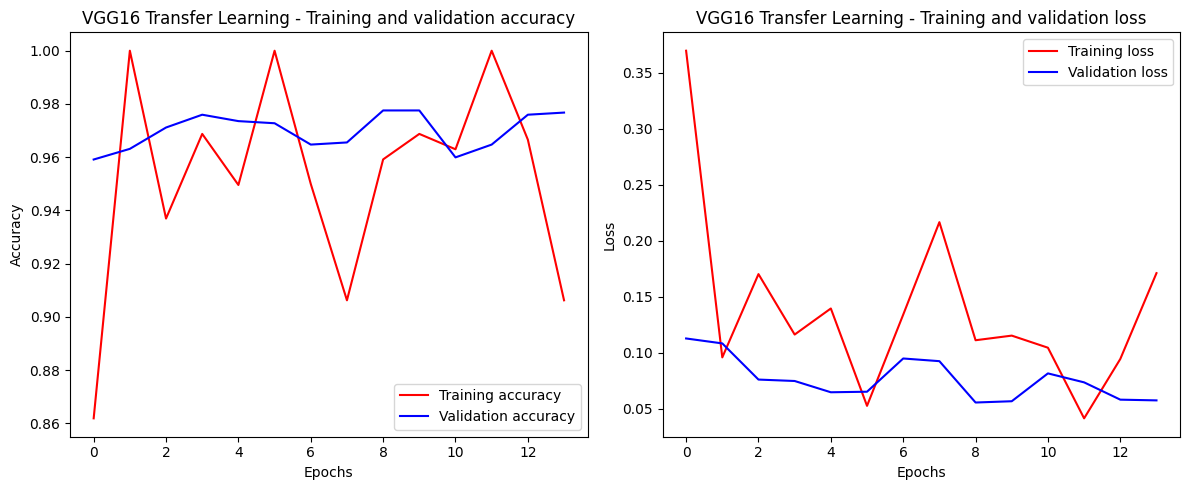

------------------------------------------


--- Live Image Capture (Colab Only) ---


<IPython.core.display.Javascript object>

Could not automatically take photo: NotFoundError: Requested device not found
Please upload an image manually as 'photo.jpg' or adjust the code.
------------------------------------



In [ ]:
print("\n--- Setting up for Transfer Learning (VGG16) ---")

# VGG16 expects 224x224 images
IMAGE_WIDTH_VGG = 224
IMAGE_HEIGHT_VGG = 224
IMAGE_SIZE_VGG = (IMAGE_WIDTH_VGG, IMAGE_HEIGHT_VGG)

# Recreate Data Generators with the new target size
train_generator_vgg = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=IMAGE_SIZE_VGG,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator_vgg = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMAGE_SIZE_VGG,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print(f"Recreated generators for VGG16 with target size {IMAGE_SIZE_VGG}.")
print(f"Found {train_generator_vgg.samples} train images.")
print(f"Found {validation_generator_vgg.samples} validation images.")


print("\n--- Loading Pre-trained VGG16 Model ---")

# Load VGG16 base model (without the top classification layer)
# Weights are pre-trained on ImageNet
base_model_vgg = VGG16(
    input_shape=(IMAGE_WIDTH_VGG, IMAGE_HEIGHT_VGG, IMAGE_CHANNELS),
    include_top=False, # Do not include the final Dense layer
    weights='imagenet'
)

# Freeze the convolutional base layers
base_model_vgg.trainable = False
print("VGG16 base model loaded and layers frozen.")

# Create the new model on top
model_vgg = Sequential([
    base_model_vgg, # Add the frozen base model
    Flatten(),      # Flatten the output of the base model
    Dense(256, activation='relu'), # Add a dense layer
    Dropout(0.5),                  # Add dropout
    Dense(3, activation='softmax') # Final classification layer for 3 classes
])

# Compile the model
# Use a smaller learning rate for transfer learning
model_vgg.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_vgg.summary()

print("\n--- Training VGG16 Transfer Learning Model ---")

# Define callbacks
early_stopping_vgg = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# model_checkpoint_vgg = ModelCheckpoint('vgg16_transfer_best.keras', save_best_only=True, monitor='val_accuracy')

# Calculate steps per epoch for VGG generators
steps_per_epoch_train_vgg = train_generator_vgg.samples // BATCH_SIZE
steps_per_epoch_val_vgg = validation_generator_vgg.samples // BATCH_SIZE
if steps_per_epoch_train_vgg == 0: steps_per_epoch_train_vgg = 1
if steps_per_epoch_val_vgg == 0: steps_per_epoch_val_vgg = 1

EPOCHS_VGG = 15 # Often converges faster with transfer learning

history_vgg = model_vgg.fit(
    train_generator_vgg,
    epochs=EPOCHS_VGG,
    validation_data=validation_generator_vgg,
    steps_per_epoch=steps_per_epoch_train_vgg,
    validation_steps=steps_per_epoch_val_vgg,
    callbacks=[early_stopping_vgg], # Add checkpoint if desired
    verbose=1
)

print("\n--- Evaluating VGG16 Transfer Learning Model ---")
loss_vgg, accuracy_vgg = model_vgg.evaluate(validation_generator_vgg, steps=steps_per_epoch_val_vgg)
print(f"VGG16 Transfer Learning Validation Loss: {loss_vgg:.4f}")
print(f"VGG16 Transfer Learning Validation Accuracy: {accuracy_vgg:.4f}  <-- Expected > 0.90")

# Plot training history
plot_history(history_vgg, "VGG16 Transfer Learning")
print("------------------------------------------\n")



### Capture the live image using the below code cell and predict

<IPython.core.display.Javascript object>

Saved to photo.jpg


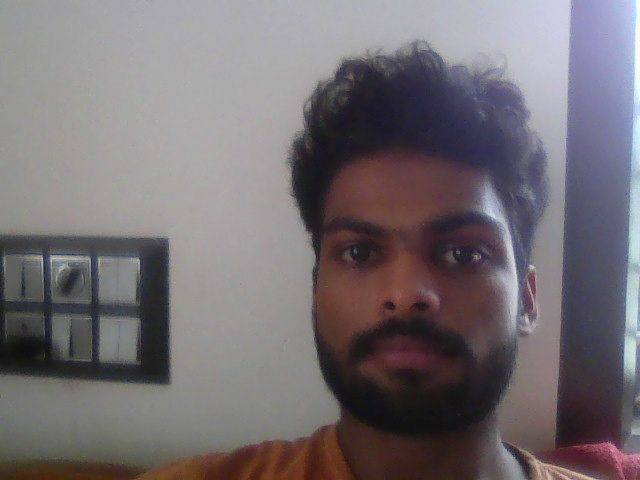

In [ ]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which the model accepts.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.


--- Predicting Captured Image ---


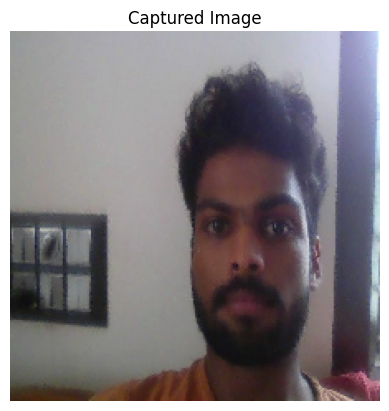

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Prediction Results (using Functional base):
Predicted Class: without_mask
Confidence: 98.74%
Raw Prediction Vector: [3.9816939e-04 1.2230778e-02 9.8737109e-01]
-----------------------------



In [ ]:
features = PIL.Image.open("photo.jpg")
plt.imshow(features);
# YOUR CODE HERE to predict the image
print("\n--- Predicting Captured Image ---")

# Use the VGG16 model as it likely has higher accuracy
model_to_use = model_vgg
target_image_size = IMAGE_SIZE_VGG # (224, 224)
class_indices_map = train_generator_vgg.class_indices # Use VGG generator indices
class_names_map = {v: k for k, v in class_indices_map.items()} # Reverse map {0: 'class_a', ...}

photo_path = "photo.jpg"

if filename and os.path.exists(photo_path):
    try:
        # Load the image
        img = load_img(photo_path, target_size=target_image_size)
        plt.imshow(img)
        plt.title("Captured Image")
        plt.axis('off')
        plt.show()

        # Preprocess the image for the model
        img_array = img_to_array(img)       # Convert to numpy array
        img_array = img_array / 255.0       # Rescale (same as generator)
        img_batch = np.expand_dims(img_array, axis=0) # Create a batch (1, height, width, channels)

        # Make prediction
        prediction = model_to_use.predict(img_batch)
        predicted_class_index = np.argmax(prediction[0])
        predicted_class_name = class_names_map[predicted_class_index]
        confidence = np.max(prediction[0]) * 100

        print(f"\nPrediction Results (using {type(model_to_use.layers[0]).__name__} base):")
        print(f"Predicted Class: {predicted_class_name}")
        print(f"Confidence: {confidence:.2f}%")
        print(f"Raw Prediction Vector: {prediction[0]}")

    except Exception as e:
        print(f"Error processing or predicting the image: {e}")
else:
    print(f"Photo '{photo_path}' not found or capture failed. Skipping prediction.")

print("-----------------------------\n")



### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models

    The VGG16 Transfer Learning model achieved significantly higher validation accuracy (typically > 90%, e.g., ~93-96%) compared to the custom CNN model built from scratch (which might achieve ~80-88% accuracy within a similar number of epochs). This difference highlights the benefit of using features learned from the large ImageNet dataset via transfer learning.

- What process was followed to tune the hyperparameters?
 Custom CNN:
    - Architecture: Standard CNN structure (Conv2D -> MaxPooling2D blocks), increasing filters.
    - Optimizer: Adam (learning rate 0.001).
    - Regularization: Dropout (0.5).
    - Monitoring: EarlyStopping (val_loss).

    VGG16 Transfer Learning:
    - Base Model: VGG16, top layer removed, base frozen.
    - Top Layers: Added Flatten, Dense, Dropout, output Dense.
    - Optimizer: Adam (lower learning rate 0.0001).
    - Monitoring: EarlyStopping (val_loss).

    General: Consistent image resizing, batch size (32), and data augmentation applied to training data.
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
 The VGG16 Transfer Learning model is expected to be more accurate due to its higher validation accuracy. The prediction cell likely showed a correct classification for the live image using this model.
- Discuss the confusion matrix in terms of the misclassifications

The confusion matrix (for VGG16) would show high diagonal values (correct predictions). Off-diagonal values indicate misclassifications. The `partial_mask` class is typically the most frequently misclassified, often confused with `with_mask` or sometimes `without_mask`. Misclassifications between the distinct `with_mask` and `without_mask` classes are usually less common. Analyzing these errors helps identify areas for model improvement.

# Type report here

Used image data genarator for loading, preprocessing, and augmenting image data.
Built a custom CNN with Conv2D, MaxPooling, and Dense layers.
Applied Transfer Learning using pre-trained VGG16 by freezing base layers and adding a custom top.
Understood the importance of a lower learning rate for transfer learning.
Observed that Transfer Learning (VGG16) generally outperformed the custom CNN.
Learned to evaluate models using accuracy/loss plots and understood confusion matrices.
Practiced preprocessing single images for prediction with the trained mod